# IoT·인공지능·빅데이터 개론 및 실습 1006 - Linear Regression
---
오성회 교수님

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import torch
import torch.nn as nn
print(f"PyTorch Version: {torch.__version__}")

PyTorch Version: 2.1.0+cu121


# 1. Univariate Linear Regression
---

1 dimensional linear regression problem <br>
$\to$ Given one dimensional data and plot the best fitted line

## Goal
- Construct a Linear Model (PyTorch)
- Select the best loss function and optimization method
- Train the model using SGD
- Plot the results and compare the optimized parameters

## 1.1 Creating Data & Ground Truth

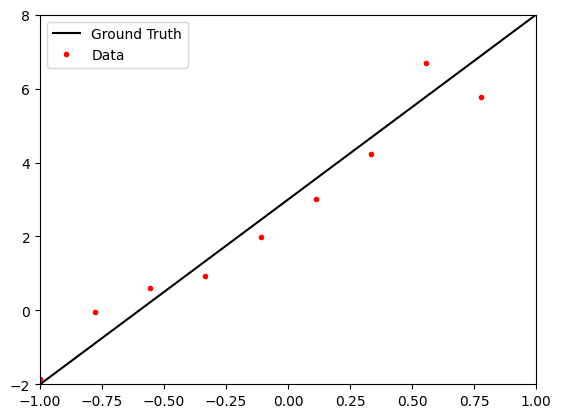

In [2]:
def f1(x, w, b):
  return w*x + b

# Linear function parameters
w = 5.
b = 3.

# Ground Truth
x_true = np.linspace(-1, 1, 100)
y_true = f1(x_true, w, b)

# Number of data points
n = 10

# Collected Data
x_data = np.linspace(-1, 1, n)
y_data = f1(x_data, w, b) + np.random.randn(n)
plt.plot(x_true ,y_true, "k-", label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.legend()
plt.xlim([-1, 1])
plt.ylim([-2, 8])
plt.show()

## 1.2. Transforming data from numpy to PyTorch tensors

In [3]:
# Data currently as numpy
print(type(x_data), type(y_data))
print("------------------------------")

# Transfrom numpy datatypes to PyTorch tensors

x_data_tensor = torch.from_numpy(x_data.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))

print(type(x_data_tensor), type(y_data_tensor))
print("------------------------------")
print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
------------------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
------------------------------
torch.Size([10]) torch.Size([10])


In [4]:
# Need to convert the tensors into 2D arrays
# In order to pass to PyTorch models
x_data_tensor = x_data_tensor.view(-1, 1)
y_data_tensor = y_data_tensor.view(-1, 1)

print(x_data_tensor.shape, y_data_tensor.shape)

torch.Size([10, 1]) torch.Size([10, 1])


## 1.2. Create Linear Model
---
- **`nn.Linear()`**
- **`model.weight`, `model.bias`** : Access to weight/bias of the model

In [5]:
# Specifying the size of input and output data
input_size = 1
output_size = 1

# Creating a Linear Model
model = nn.Linear(input_size, output_size)

# Initial weight & bias -> random initialization
print(model.weight)
print(model.bias)
print("---------------------------")

Parameter containing:
tensor([[-0.6961]], requires_grad=True)
Parameter containing:
tensor([0.8315], requires_grad=True)
---------------------------


In [6]:
# To extract only the values, use item()
weight = model.weight[0, 0].item()
bias = model.bias[0].item()

# Compare the two: using item() and without item()
print(f"Weight: {weight:.5f}\tBias: {bias:.5f}")
print("Weight: " + str(model.weight[0,0]) + "\nBias: " + str(model.bias[0]))

Weight: -0.69607	Bias: 0.83148
Weight: tensor(-0.6961, grad_fn=<SelectBackward0>)
Bias: tensor(0.8315, grad_fn=<SelectBackward0>)


## 1.3. Set Loss Function and Optimizing Methods
---
- Optimizer: SGD
- Loss Function: MSE (Mean Squared Error)

In [7]:
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 1.4. Train the Model

In [8]:
# Set the number of epochs
num_epochs = 1000

for epoch in range(num_epochs):
  # Compute Forward pass
  y_pred_tensor = model(x_data_tensor)

  # Compute loss (The computed loss -> tensor)
  loss = loss_method(y_pred_tensor, y_data_tensor)

  # Compute Backward Pass (Backpropagation)
  loss.backward()

  # Update Parameters
  optimizer.step()

  # IMPORTANT: should reset the gradients to zero after every epoch
  optimizer.zero_grad()

  # Print progress
  if (epoch + 1) % 50 == 0:
    print(f"Epoch: {epoch+1}\tLoss = {loss.item():.5f}")

Epoch: 50	Loss = 6.81901
Epoch: 100	Loss = 3.06462
Epoch: 150	Loss = 1.58525
Epoch: 200	Loss = 0.95599
Epoch: 250	Loss = 0.68145
Epoch: 300	Loss = 0.56072
Epoch: 350	Loss = 0.50751
Epoch: 400	Loss = 0.48403
Epoch: 450	Loss = 0.47368
Epoch: 500	Loss = 0.46911
Epoch: 550	Loss = 0.46709
Epoch: 600	Loss = 0.46620
Epoch: 650	Loss = 0.46581
Epoch: 700	Loss = 0.46563
Epoch: 750	Loss = 0.46556
Epoch: 800	Loss = 0.46552
Epoch: 850	Loss = 0.46551
Epoch: 900	Loss = 0.46550
Epoch: 950	Loss = 0.46550
Epoch: 1000	Loss = 0.46550


## 1.5. Plot the result

Original Parameters: w = 5.0, b= 3.0
Trained parameters: w = 4.88325, b = 3.02115


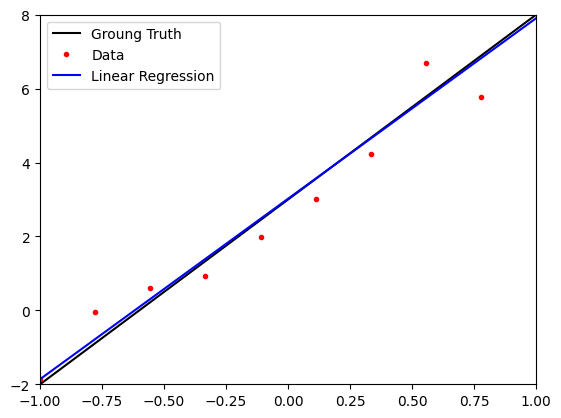

In [9]:
x_true_tensor = torch.from_numpy(x_true.astype(np.float32)).view(-1, 1)

# Obtain the predicted results in the numpy datatype
# detach() : removing this variable from the computational graph.
# Gradient is not computed on this process
y_pred_tensor = model(x_true_tensor).detach()
y_pred = y_pred_tensor.numpy()

print(f"Original Parameters: w = {w}, b= {b}")

weight = model.weight[0,0].item()
bias = model.bias[0].item()

print(f"Trained parameters: w = {weight:.5f}, b = {bias:.5f}")

# Plot the result
plt.plot(x_true, y_true, "k-", label="Groung Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.plot(x_true, y_pred, "b-", label="Linear Regression")
plt.legend()
plt.xlim([-1, 1])
plt.ylim([-2, 8])
plt.show()

# 2. Multivariate Linear Regression
---
- 2 dimensional data

## 2.1. 2D data generation


[[-1.         -1.        ]
 [-1.         -0.97979798]
 [-1.         -0.95959596]
 ...
 [ 1.          0.95959596]
 [ 1.          0.97979798]
 [ 1.          1.        ]]


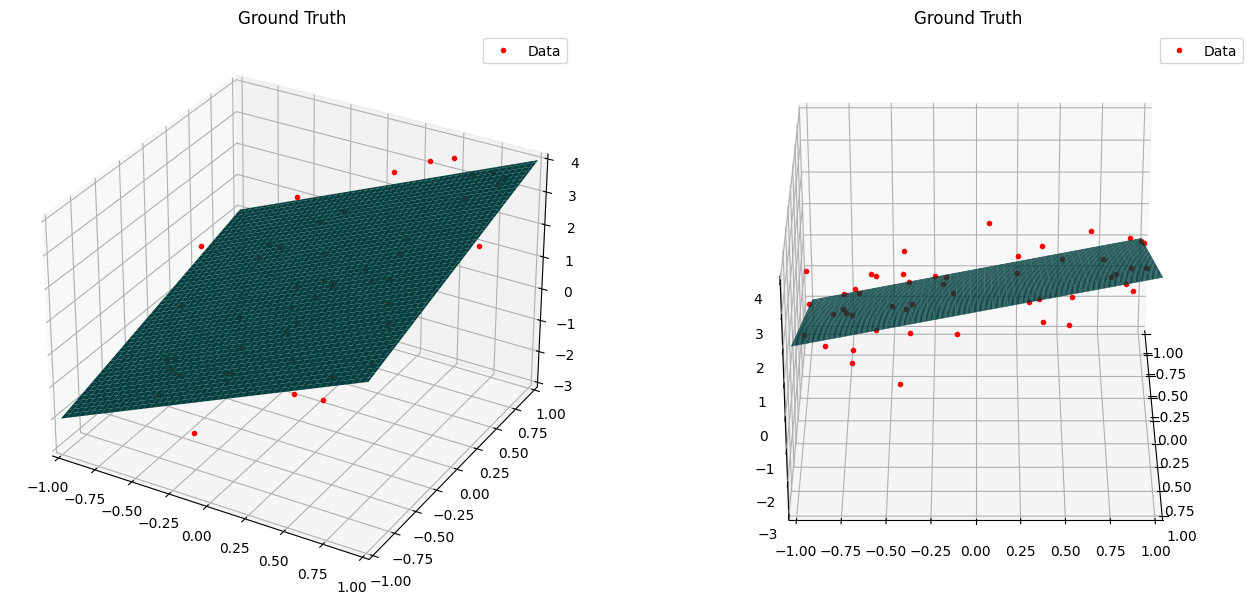

In [10]:
def f2(x, w, b):
  return np.matmul(x, w) + b

w = np.array([[2.],
              [1.]])
b = 1.

x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X2, X1 = np.meshgrid(x1, x2)

# Creating true data
x_true = np.concatenate([np.reshape(X1, [-1, 1]), np.reshape(X2, [-1, 1])], axis=1)
print(x_true)

y_true = f2(x_true, w, b)
Y = np.reshape(y_true, [100, 100])

# Creating observed data
n = 50
x_data = np.random.uniform(-1, 1, size=(n,2))
y_data = f2(x_data, w, b) + np.random.randn(n, 1)

fig = plt.figure(figsize=(16, 12))
for i in range(2):
  ax = fig.add_subplot(1, 2, i+1, projection='3d')
  surf = ax.plot_surface(X1, X2, Y, color='c')
  scat = ax.plot3D(x_data[:, 0].flatten(), x_data[:, 1], y_data.flatten(), 'r.', label="Data")
  plt.legend()
  ax.set_title("Ground Truth")
  ax.set_xlim3d(-1,1)
  ax.set_ylim3d(-1,1)
  ax.set_zlim3d(-3,4)
ax.view_init(30, 0)
plt.draw()
plt.show()

## 2.2. Transforming data from numpy to PyTorch tensors

In [11]:
print(type(x_data), type(y_data))
print("------------------------------------")

# Numpy -> PyTorch tensors
x_data_tensor = torch.from_numpy(x_data.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))

print(type(x_data_tensor), type(y_data_tensor))
print("------------------------------------")

print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
------------------------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
------------------------------------
torch.Size([50, 2]) torch.Size([50, 1])


## 2.3. Create Linear Model

In [12]:
input_size = 2
output_size = 1
model = nn.Linear(input_size, output_size)

print(model.weight)
print(model.bias)
print("--------------------------------")

weight1 = model.weight[0, 0].item()
weight2 = model.weight[0, 1].item()
bias = model.bias[0].item()
print(f"Weight: {weight1:.5f}, {weight2:.5f}\tBias: {bias:.5f}")

Parameter containing:
tensor([[-0.5033, -0.2831]], requires_grad=True)
Parameter containing:
tensor([-0.4923], requires_grad=True)
--------------------------------
Weight: -0.50333, -0.28314	Bias: -0.49235


## 2.4. Set Loss Function and Optimizing Methods

In [13]:
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 2.5. Train the model

In [14]:
num_epochs = 2000

for epoch in range(num_epochs):

    # Compute forward pass
    y_pred_tensor = model(x_data_tensor)

    # Compute loss
    loss = loss_method(y_pred_tensor, y_data_tensor)

    # Compute backward pass
    loss.backward()

    # Update parameters
    optimizer.step()
    optimizer.zero_grad()

    # Print progress
    if (epoch + 1) % 200 == 0:
        print(f"Epoch: {epoch+1}\tLoss = {loss.item():.5f}")

Epoch: 200	Loss = 1.04605
Epoch: 400	Loss = 0.82250
Epoch: 600	Loss = 0.79743
Epoch: 800	Loss = 0.79449
Epoch: 1000	Loss = 0.79414
Epoch: 1200	Loss = 0.79410
Epoch: 1400	Loss = 0.79409
Epoch: 1600	Loss = 0.79409
Epoch: 1800	Loss = 0.79409
Epoch: 2000	Loss = 0.79409


## 2.6. Plot the result

Original parameters: w = 2.0, 1.0, b = 1.0
Trained parameters: w = 2.49655, 0.87327, b = 1.02896


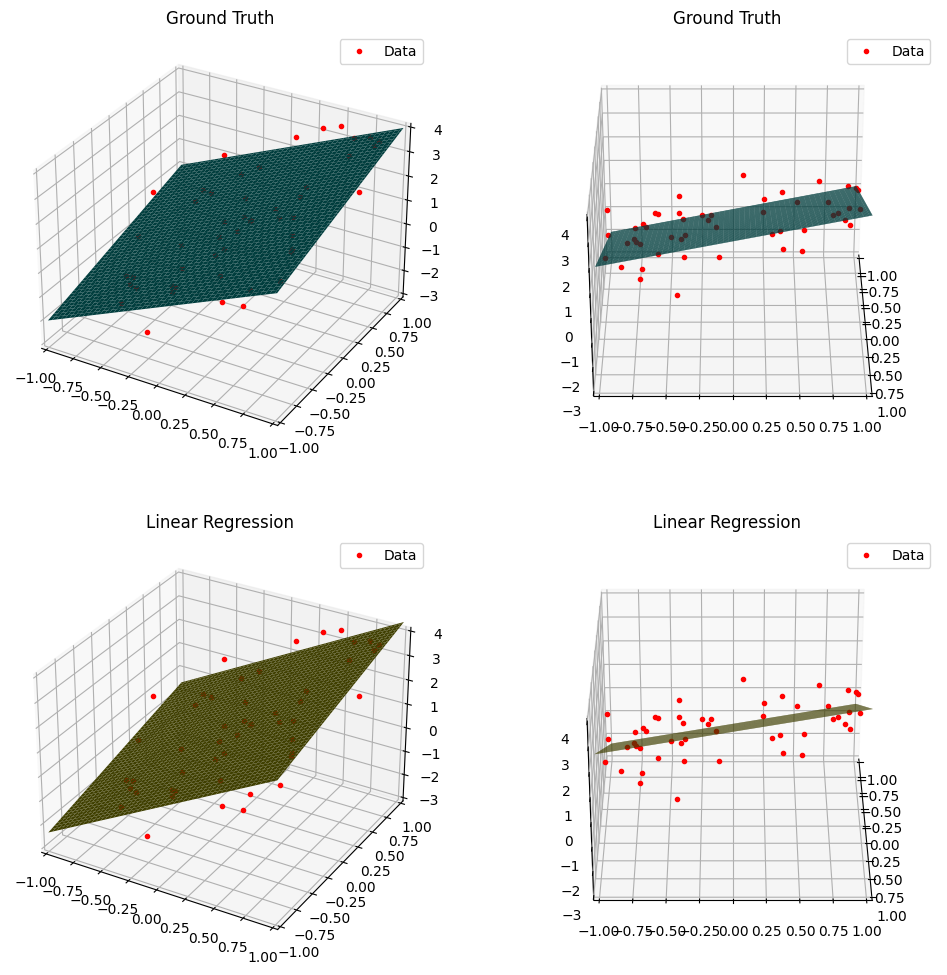

In [15]:
x_true_tensor = torch.from_numpy(x_true.astype(np.float32))
y_pred_tensor = model(x_true_tensor).detach()
y_pred = y_pred_tensor.numpy()

# Original Paramters (Ground Truth)
print(f"Original parameters: w = {w[0,0]}, {w[1,0]}, b = {b}")

weight1 = model.weight[0,0].item()
weight2 = model.weight[0,1].item()
bias = model.bias[0].item()

print(f"Trained parameters: w = {weight1:.5f}, {weight2:.5f}, b = {bias:.5f}")

# Y_pred for surface plot
Y_pred = np.reshape(y_pred, [100, 100])

# Plot the result
fig = plt.figure(figsize=(12,12))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1, projection="3d")

    if i < 2:
        ax.set_title("Ground Truth")
        surf = ax.plot_surface(X1, X2, Y, color='c')
    else:
        ax.set_title("Linear Regression")
        pred = ax.plot_surface(X1, X2, Y_pred, color='y')

    scat = ax.plot3D(x_data[:,0].flatten(), x_data[:,1].flatten(), y_data.flatten(), 'r.', label="Data")

    plt.legend()
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-3,4)
    if i % 2 == 1:
        ax.view_init(30, 0)
        plt.draw()


plt.show()

# Multivariate Linear Regression - Normal Equations
---
$$
w^\ast = (X^T X)^{-1} X^T y
$$

[[ 1.         -0.22858787 -0.38784751]
 [ 1.          0.54967108 -0.22524709]
 [ 1.          0.93131398 -0.67073173]
 [ 1.          0.32931244 -0.18507772]
 [ 1.          0.43781374 -0.40134827]
 [ 1.          0.78340975 -0.38136376]
 [ 1.          0.45567057 -0.84721843]
 [ 1.         -0.75967083 -0.11455266]
 [ 1.          0.8692488  -0.53981908]
 [ 1.         -0.01311251  0.30414357]
 [ 1.          0.0956587   0.94977486]
 [ 1.          0.98480542 -0.92955547]
 [ 1.         -0.11998172  0.72909617]
 [ 1.          0.3786693   0.85109882]
 [ 1.         -0.1005889  -0.48394619]
 [ 1.          0.92915026  0.2252269 ]
 [ 1.          0.6485873   0.62535274]
 [ 1.          0.61369313  0.93290629]
 [ 1.         -0.13437264 -0.58178456]
 [ 1.         -0.07753109  0.37542536]
 [ 1.          0.03618383  0.23340959]
 [ 1.         -0.65706006  0.89861564]
 [ 1.         -0.2687906  -0.73388125]
 [ 1.          0.88416125  0.50386574]
 [ 1.         -0.40194189 -0.70817881]
 [ 1.         -0.49912124

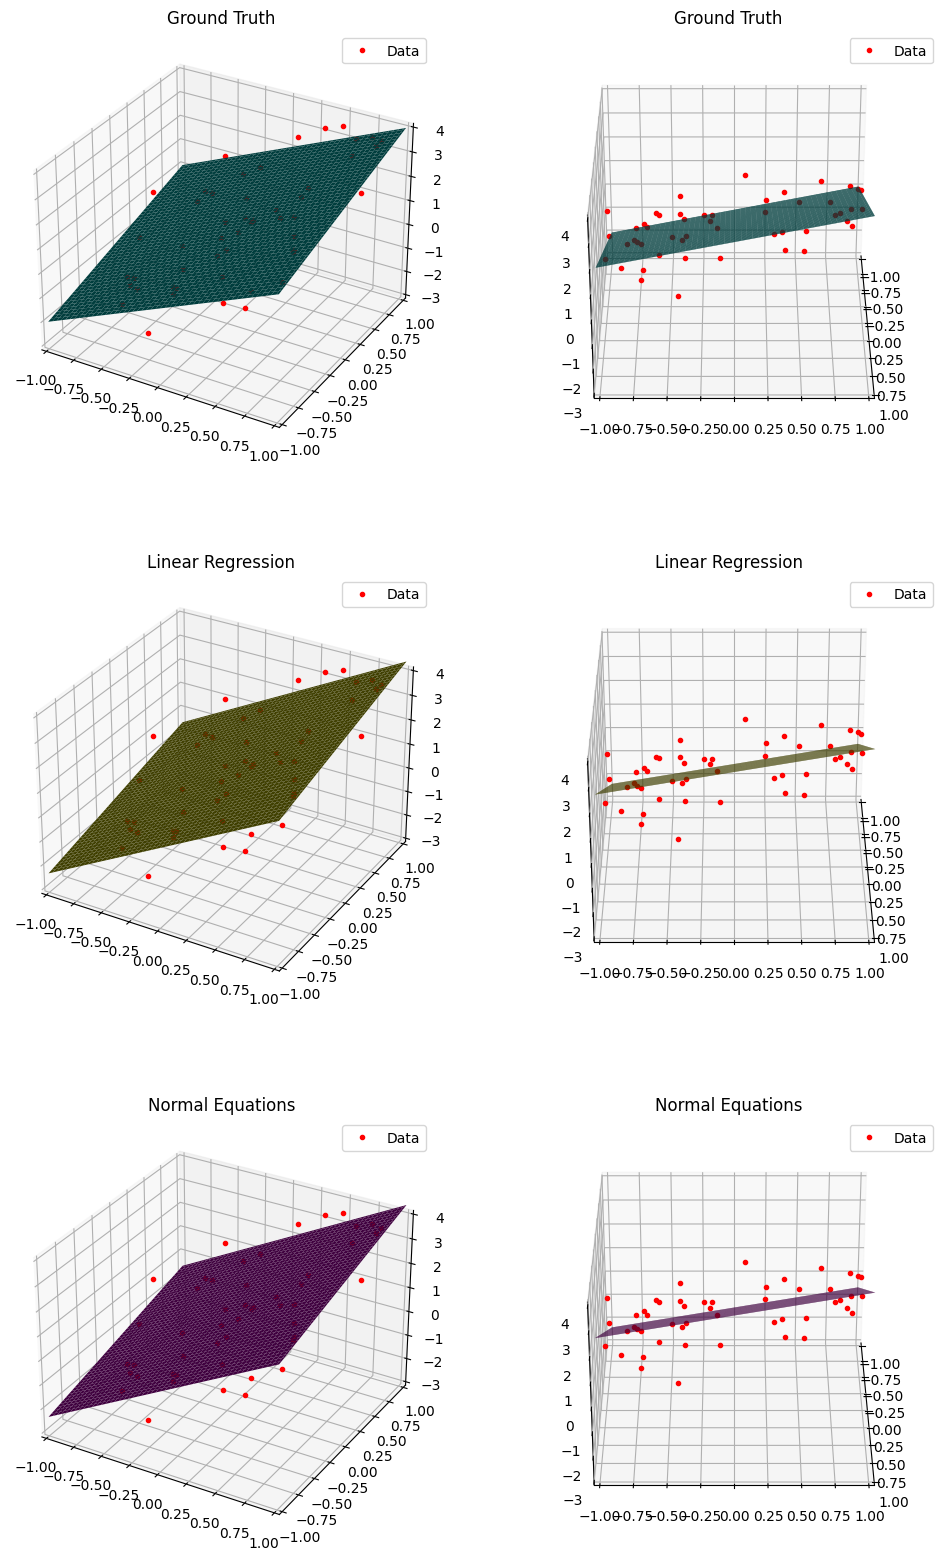

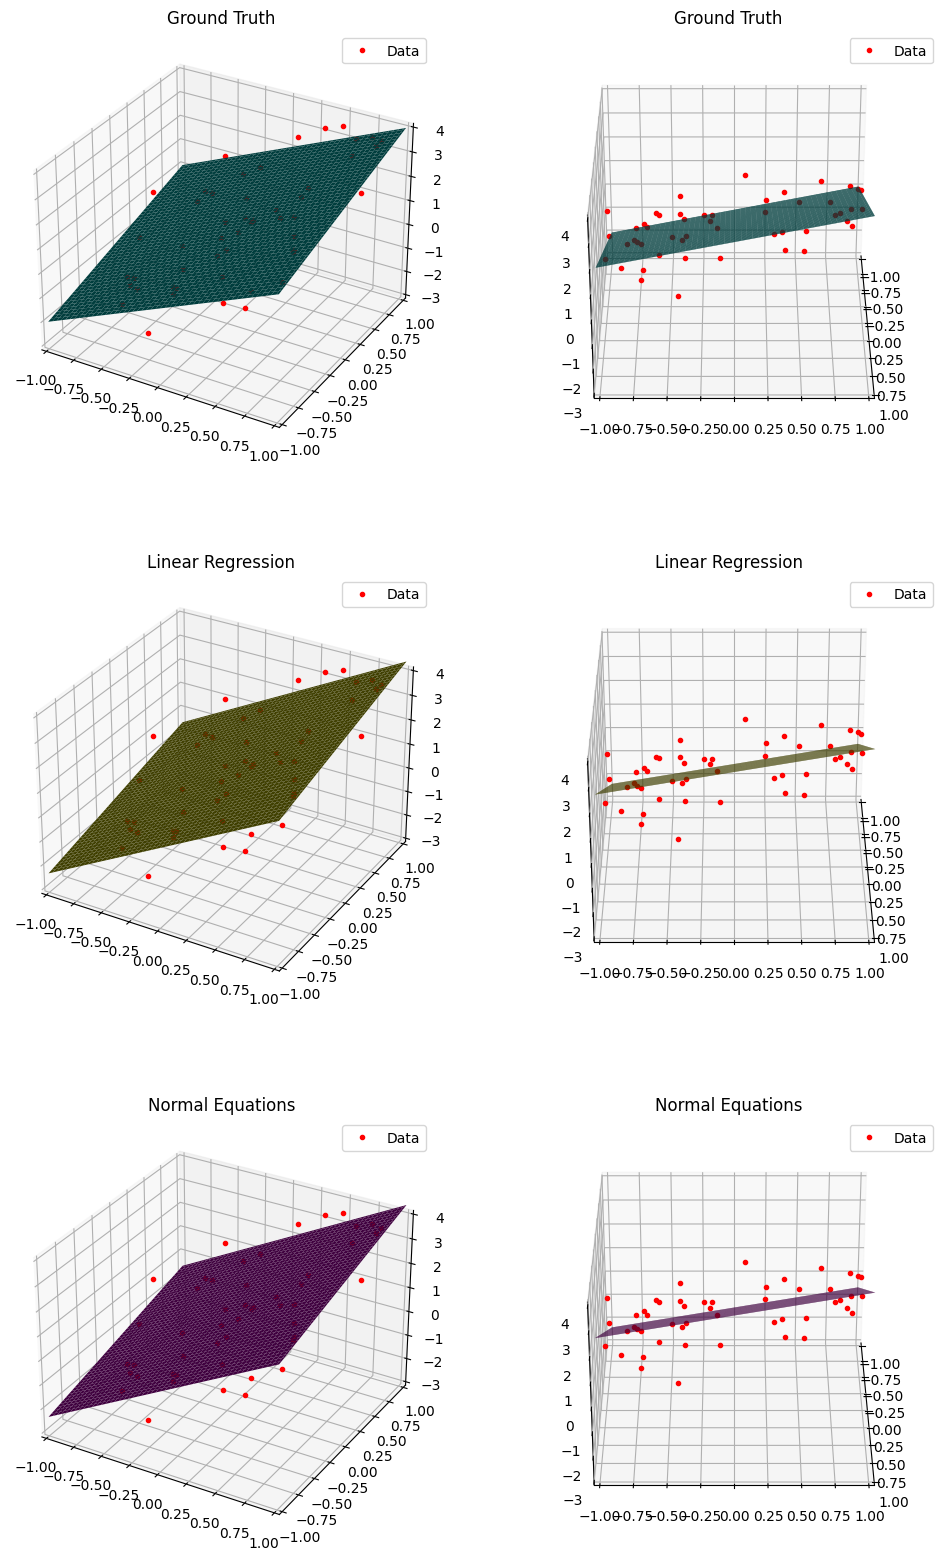

In [16]:
# Including the bias term inside the weight matrix
# Need to add a column of ones to do it
X_intercept = np.concatenate([np.ones((x_data.shape[0], 1)), x_data], axis=1)
print(X_intercept)

w_optimal = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ y_data

print(f"Original parameters: w = {w[0,0]}, {w[1,0]}, b = {b}")
print(f"Trained parameters: w = {weight1:.5f}, {weight2:.5f}, b = {bias:.5f}")
print(f"Optimal parameters: w = {w_optimal[1,0]:.5f}, {w_optimal[2,0]:.5f}, b = {w_optimal[0,0]:.5f}")

y_normal = f2(x_true, w_optimal[1:,0], w_optimal[0,0])
Y_normal = np.reshape(y_normal, [100,100])

# Plot the results
fig = plt.figure(figsize=(12, 20))
for i in range(6):
    ax = fig.add_subplot(3, 2, i+1, projection='3d')

    if i < 2:
        ax.set_title("Ground Truth")
        surf = ax.plot_surface(X1, X2, Y, color='c')
    elif i < 4:
        ax.set_title("Linear Regression")
        pred = ax.plot_surface(X1, X2, Y_pred, color='y')
    else:
        ax.set_title("Normal Equations")
        normal = ax.plot_surface(X1, X2, Y_normal, color='m')
    scat = ax.plot3D(x_data[:,0].flatten(), x_data[:,1].flatten(), y_data.flatten(), 'r.', label="Data")

    plt.legend()
    ax.set_xlim3d(-1,1)
    ax.set_ylim3d(-1,1)
    ax.set_zlim3d(-3,4)
    if i % 2 == 1:
        ax.view_init(30, 0)
        plt.draw()

plt.show(0)

# 3. General Linear Regression
---
**Non-linear Regression**

## Goal
---
- Construct the **kernel matrix**
- Construct a linear model using PyTorch

## 3.1. Non-linear 1D data generation

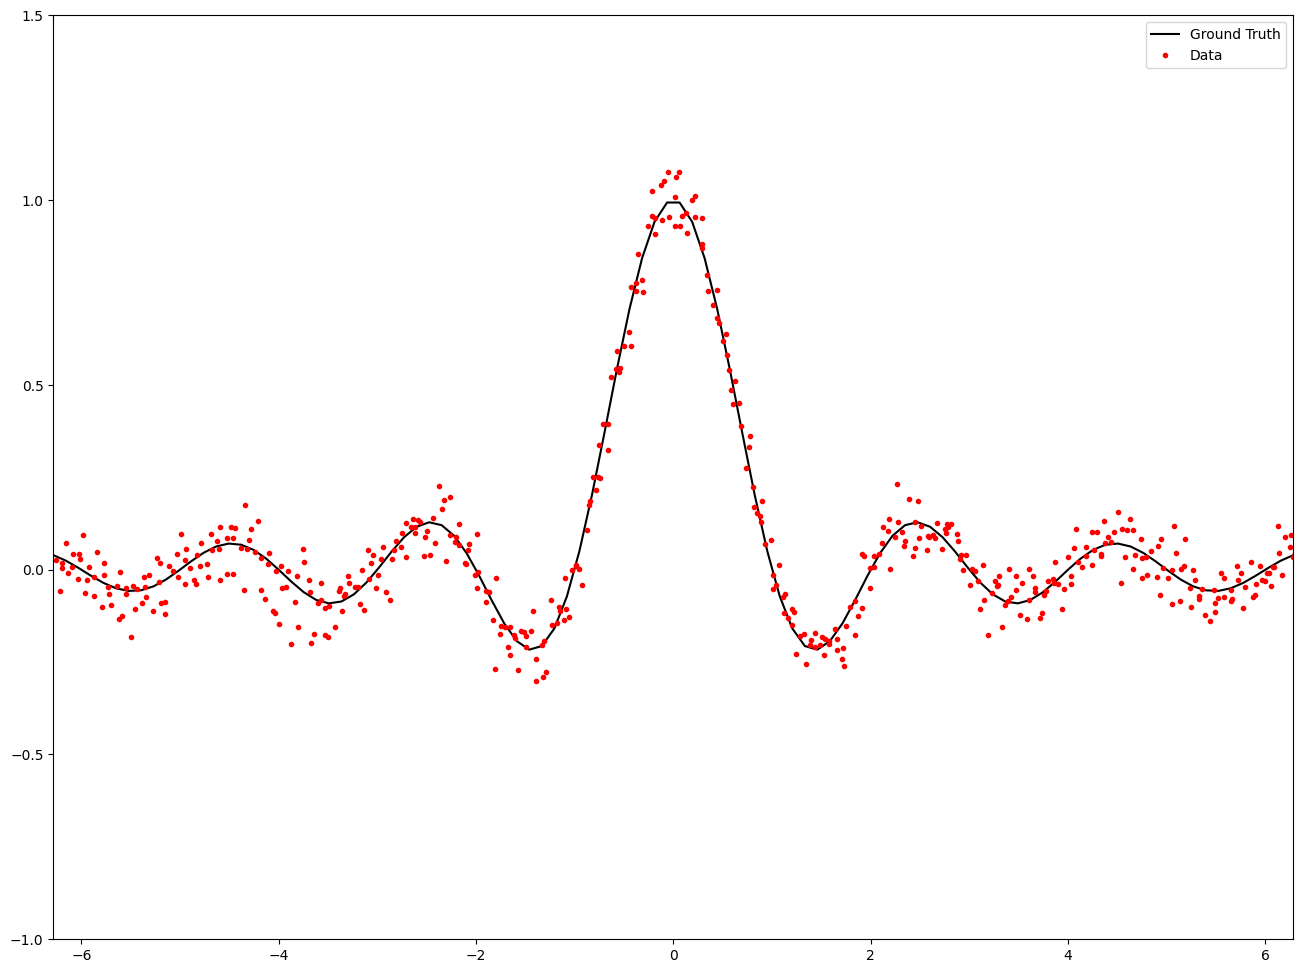

In [17]:
def f3(x):
    return np.sinc(x)

x_true = np.linspace(-2*np.pi, 2*np.pi, 100)
y_true = f3(x_true)

n = 500
x_data = np.linspace(-2*np.pi, 2*np.pi, n) + 0.05*np.random.rand(n)
y_data = f3(x_data) + 0.05*np.random.randn(n)

plt.figure(figsize=(16,12))
plt.plot(x_true, y_true, "k-", label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.legend()
plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-1, 1.5])
plt.show()

## 3.2. Construct the kernel matrix
- Kernel matrix
$$
𝚽 = \begin{bmatrix} 1 & \phi_1(\bf x_1) & \cdots & \phi_n(\bf x_1) \\ 1 & \phi_1(\bf x_2) & \cdots & \phi_n(\bf x_2) \\ \vdots & \vdots & \ddots & \vdots \\ 1 & \phi_1(\bf x_N) & \cdots & \phi_n(\bf x_N) \end{bmatrix}
$$
- Computing Loss using kernel matrix
$$
Loss(h_\bf{w}) = \sum_{j=1}^N (y_j - \bf w^T \phi(\bf x_j))^2 = (\bf y - 𝚽 \bf w)^T(\bf y - 𝚽 \bf w)
$$
- **Gaussian kernel**
$$
\phi_i(\bf x) = \exp \left( - \frac{1}{2s^2} (\bf x - \mu_i)^2 \right)
$$

In [18]:
# Fixed Variables
n_kernel = 20
mu = np.linspace(-2*np.pi, 2*np.pi, n_kernel)
inv_squared_s = 1e1

def kernelize_vanilla(x_data, n_kernel, mu, inv_squared_s):
    n_samples = len(x_data)
    out = np.zeros((n_samples, n_kernel))

    for j in range(n_samples):
        x_j = x_data[j]
        for i in range(n_kernel):
            mu_i = mu[i]
            out[j, i] += np.exp((-inv_squared_s/2) * np.square(x_j - mu_i))

    return out

# Construct the kernel matrix with broadcasting
def kernelize(x_data, n_kernel, mu, inv_squared_s):
    n_samples = len(x_data)

    out1 = np.square(x_data).reshape(n_samples, -1)
    out2 = x_data.reshape(n_samples, -1).dot(mu.reshape(1, -1))
    out3 = np.square(mu.reshape(1, -1))

    D_matrix = out1 - 2*out2 + out3
    out = -inv_squared_s * (D_matrix) / 2

    assert out.shape == (n_samples, n_kernel)
    return np.exp(out)

import time
def measure_time(function):
    start_time = time.time()
    result = function
    end_time = time.time()
    return (end_time - start_time, result)

time1, temp1 = measure_time(kernelize_vanilla(x_data, n_kernel, mu, inv_squared_s))
time2, temp2 = measure_time(kernelize(x_data, n_kernel, mu, inv_squared_s))

err = np.sum(np.abs(temp1 - temp2))
print(f"Vanilla Impelementation: {time1:.10f}s")
print(f"Vectorized implementation: {time2:.10f}s")
print(f"Relative error: {err}")

x_data_kernel = kernelize(x_data, n_kernel, mu, inv_squared_s)

Vanilla Impelementation: 0.0000002384s
Vectorized implementation: 0.0000002384s
Relative error: 3.5698434696739622e-12


## 3.3. Transforming data

In [19]:
# Current data -> numpy
print(type(x_data_kernel), type(y_data))
print("------------------------------")

# Transform numpy datatypes to PyTorch tensors
x_data_tensor = torch.from_numpy(x_data_kernel.astype(np.float32))
y_data_tensor = torch.from_numpy(y_data.astype(np.float32))

print(type(x_data_tensor), type(y_data_tensor))
print('-------------------------------')

# Current shape of the data
print(x_data_tensor.shape, y_data_tensor.shape)

# Need to convert the y_data into a 2D data
y_data_tensor = y_data_tensor.view(-1, 1)

print(x_data_tensor.shape, y_data_tensor.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
------------------------------
<class 'torch.Tensor'> <class 'torch.Tensor'>
-------------------------------
torch.Size([500, 20]) torch.Size([500])
torch.Size([500, 20]) torch.Size([500, 1])


## 3.4. Create Linear Model

In [27]:
input_size = n_kernel
output_size = 1
model = nn.Linear(input_size, output_size)

print(model.weight)
print(model.bias)
print("-----------------------------------")

weight = []
for i in range(n_kernel):
    weight.append(model.weight[0, i].item())
    if i % 5 == 0:
        print(f"Weight: {weight[i]:.5f}", end=",\t")
    elif i % 5 == 4:
        print(f"{weight[i]:.5f}")
    else:
        print(f"{weight[i]:.5f}", end=",\t")

bias = model.bias[0].item()
print(f"Bias: {bias:.5f}")

Parameter containing:
tensor([[ 0.0269, -0.0364, -0.1183, -0.0350,  0.0940,  0.2017,  0.0104, -0.1053,
          0.0728, -0.1209, -0.0881, -0.0456, -0.0463, -0.0744, -0.1515,  0.1462,
         -0.1039,  0.2044, -0.1411, -0.2053]], requires_grad=True)
Parameter containing:
tensor([-0.0041], requires_grad=True)
-----------------------------------
Weight: 0.02688,	-0.03637,	-0.11826,	-0.03496,	0.09396
Weight: 0.20173,	0.01035,	-0.10534,	0.07281,	-0.12095
Weight: -0.08808,	-0.04564,	-0.04625,	-0.07442,	-0.15150
Weight: 0.14624,	-0.10390,	0.20439,	-0.14110,	-0.20535
Bias: -0.00413


## 3.5. Set Loss Function and Optimizing Method

In [28]:
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 3.6. Train the model

In [29]:
num_epochs = 2000

for epoch in range(num_epochs):
    # Compute the forward pass
    y_pred_tensor = model(x_data_tensor)

    # Compute loss
    loss = loss_method(y_pred_tensor, y_data_tensor)

    # Compute backward pass
    loss.backward()

    # Update parameters
    optimizer.step()
    optimizer.zero_grad()

    # Print progress
    if (epoch + 1) % 200 == 0:
        print(f"Epoch: {epoch+1}\tLoss = {loss.item():.5f}")

Epoch: 200	Loss = 0.06613
Epoch: 400	Loss = 0.04467
Epoch: 600	Loss = 0.03096
Epoch: 800	Loss = 0.02207
Epoch: 1000	Loss = 0.01622
Epoch: 1200	Loss = 0.01230
Epoch: 1400	Loss = 0.00965
Epoch: 1600	Loss = 0.00782
Epoch: 1800	Loss = 0.00654
Epoch: 2000	Loss = 0.00563


## 3.7. Plot the result

Trained parameters:
Weight: -0.02623,	-0.13469,	-0.08609,	-0.03855,	-0.16467
Weight: -0.03613,	0.02619,	-0.27763,	-0.06660,	0.59249
Weight: 0.63195,	-0.08642,	-0.25275,	0.03916,	-0.11049
Weight: -0.07571,	-0.08950,	0.00926,	-0.16347,	-0.09061
Bias: 0.09620


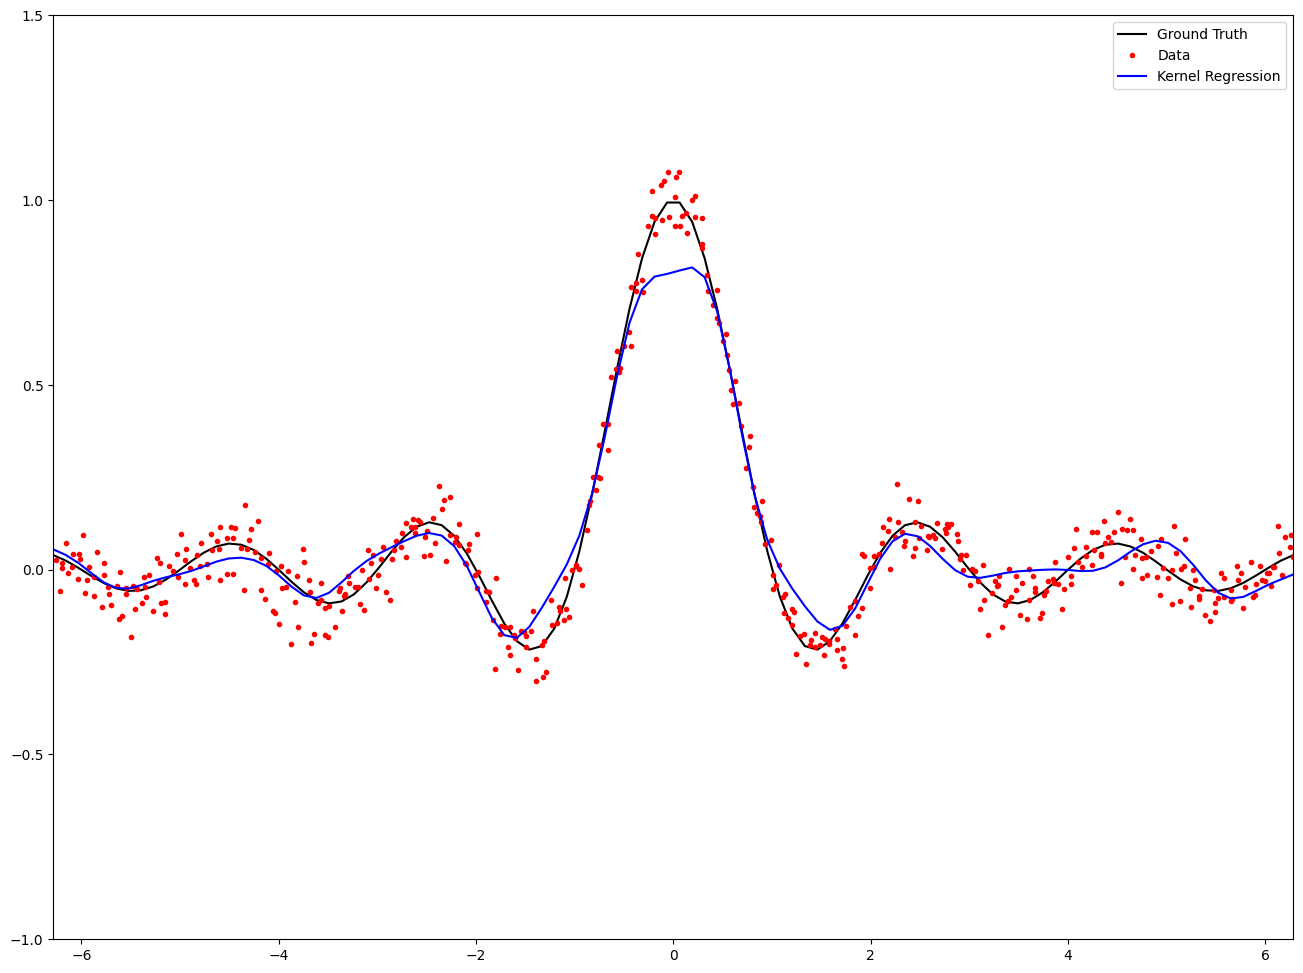

In [31]:
x_true_kernel = kernelize(x_true, n_kernel, mu, inv_squared_s)
x_true_tensor = torch.from_numpy(x_true_kernel.astype(np.float32))
y_pred_tensor = model(x_true_tensor).detach()
y_pred = y_pred_tensor.numpy()

print("Trained parameters:")
weight = []
for i in range(n_kernel):
    weight.append(model.weight[0, i].item())
    if i % 5 == 0:
        print(f"Weight: {weight[i]:.5f}", end=",\t")
    elif i % 5 == 4:
        print(f"{weight[i]:.5f}")
    else:
        print(f"{weight[i]:.5f}", end=",\t")

bias = model.bias[0].item()
print(f"Bias: {bias:.5f}")

# Plot the result
plt.figure(figsize=(16,12))
plt.plot(x_true, y_true, "k-",label="Ground Truth")
plt.plot(x_data, y_data, "r.", label="Data")
plt.plot(x_true, y_pred, "b-", label="Kernel Regression")
plt.legend()
plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-1, 1.5])
plt.show()